# Analysis of the obtained scores

## Env setup

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import json
import matplotlib.pyplot as plt
import numpy as np

## Manual Scores Analysis

Here you can find an analysis of the scores obtained by the manual evaluation of the generated code.
The scores are in range [1,5] where 1 is the worst and 5 is the best. The code generated was evaluated by me based on the following criteria:
- **Overall Satisfaction**: If I were to be suggested this code while working on a project, how satisfied would I be with it?
- **Similarity**: How similar is the generated code to the original code?
- **Completeness**: With respect to the original code, how complete is the generated code? Does it include all the necessary parts?
- **Errors**: How many errors are present in the code? (The higher the score, the fewer the errors therefor the better).

Some more insight can be said about some metrics:
- **Similarity**: It was quite difficult to rate this metric. As a rule of thumb, if the generated code was accomplishing everything the original code was accomplishing I would rate it high regardless of other parts of the code. However, if the extra-parts were to introduce deviation or errors I would give a lower score.
- **Errors**: Scores 1-2 are for code that actively introduces code errors. Scores 3-4 are for code that has some minor errors but is mostly correct. Score 5 is for code that has no errors.


In [4]:
# Load data from JSON file
with open("manual_scores.json", "r") as f:
    data = json.load(f)

# Extract metrics
satisfaction = [entry["satisfaction"] for entry in data]
similarity = [entry["similarity"] for entry in data]
completeness = [entry["completeness"] for entry in data]
errors = [entry["errors"] for entry in data]


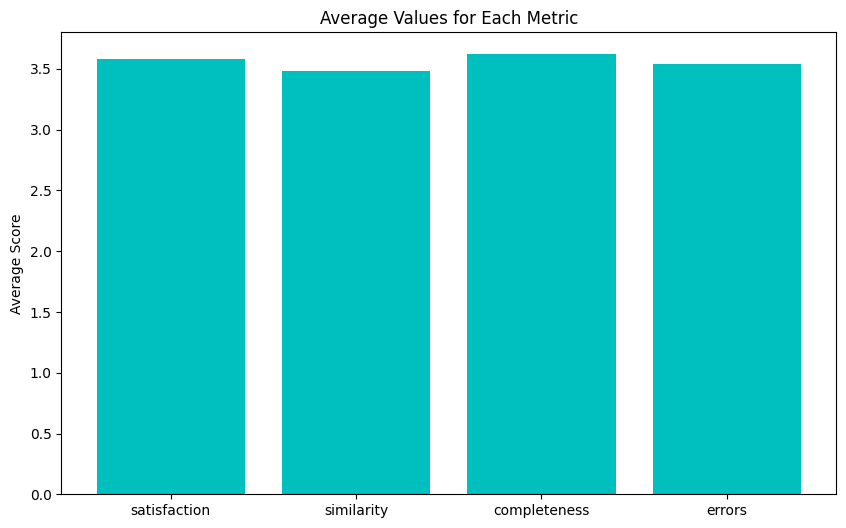

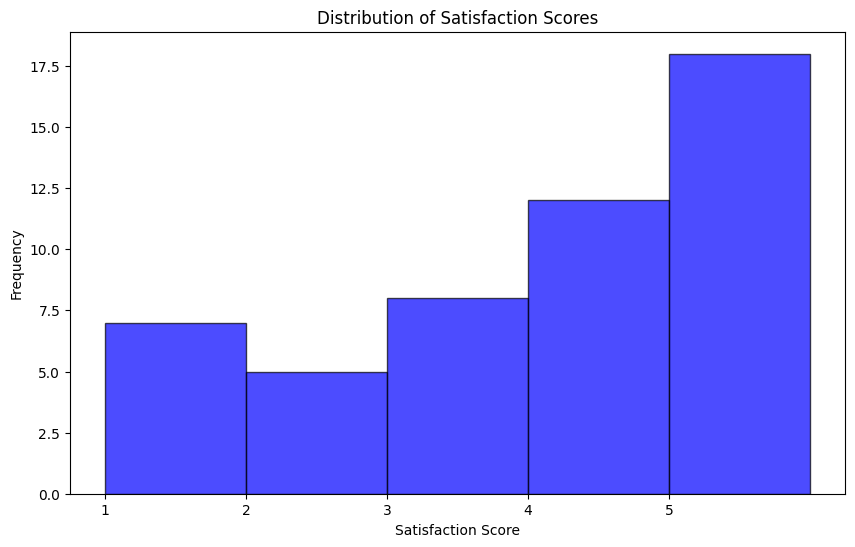

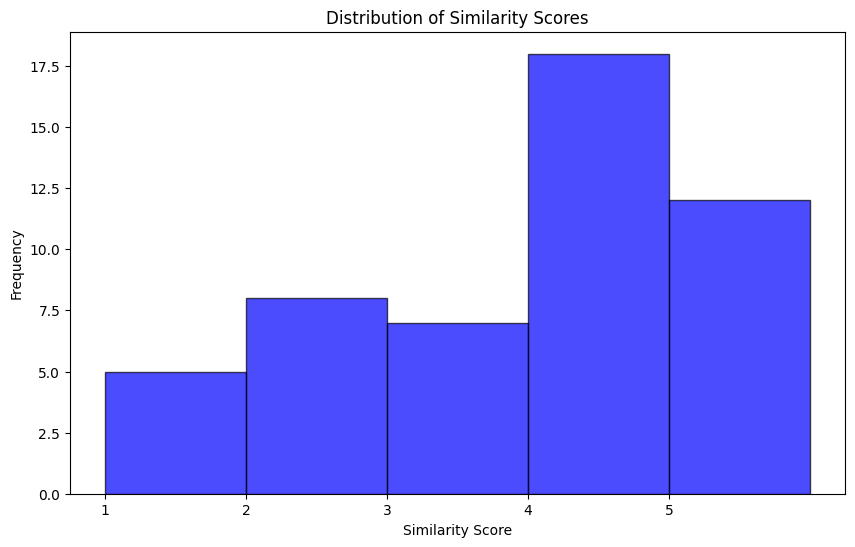

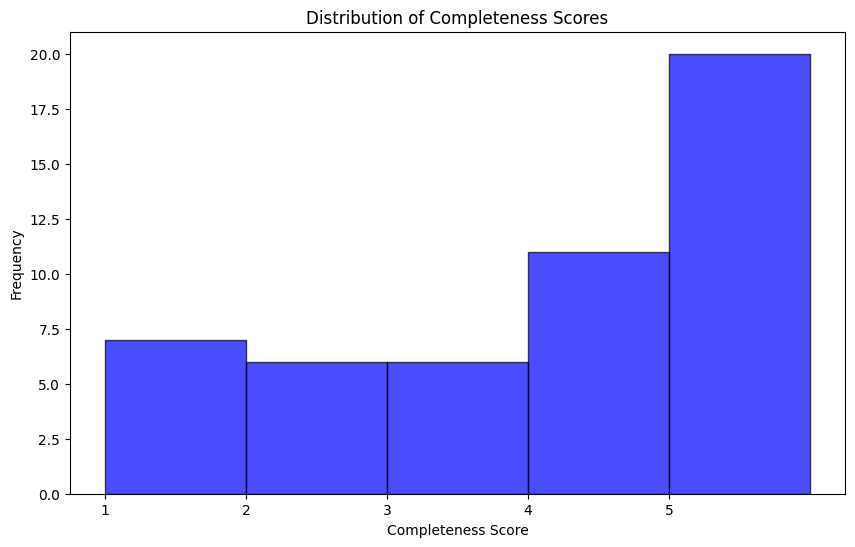

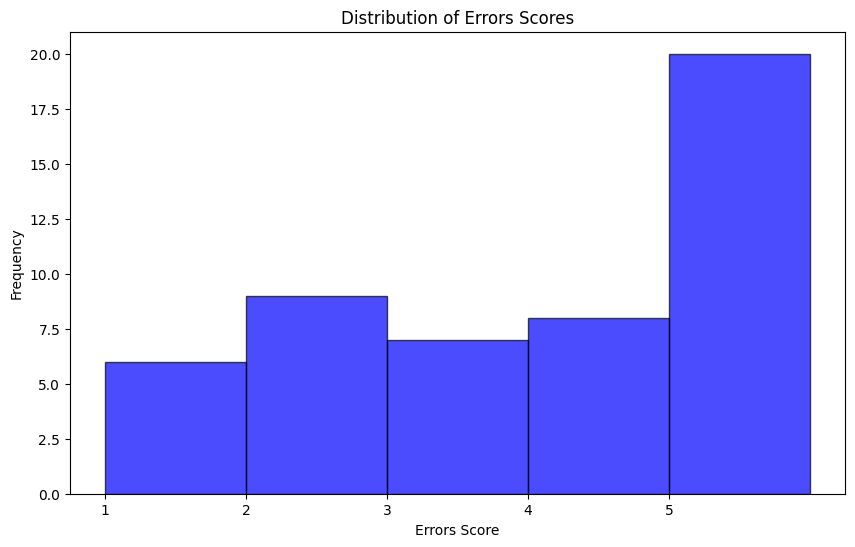

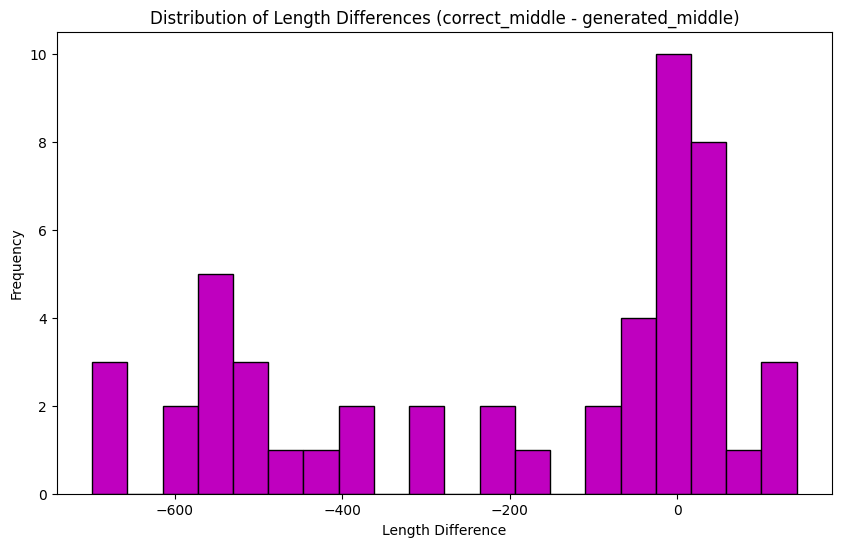

In [5]:
# Compute averages
average_scores = {
    "satisfaction": np.mean(satisfaction),
    "similarity": np.mean(similarity),
    "completeness": np.mean(completeness),
    "errors": np.mean(errors)
}

# Plot histogram of average values
plt.figure(figsize=(10, 6))
plt.bar(average_scores.keys(), average_scores.values(), color='c')
plt.title('Average Values for Each Metric')
plt.ylabel('Average Score')
plt.show()

# Histogram for each metric's distribution
metrics = {"satisfaction": satisfaction, "similarity": similarity, "completeness": completeness, "errors": errors}

for metric, values in metrics.items():
    plt.figure(figsize=(10, 6))
    plt.hist(values, bins=range(1, 7), alpha=0.7, color='b', edgecolor='black')
    plt.title(f'Distribution of {metric.capitalize()} Scores')
    plt.xlabel(f'{metric.capitalize()} Score')
    plt.ylabel('Frequency')
    plt.xticks(range(1, 6))
    plt.show()

# Additional analysis: Length difference between correct and generated middle
length_differences = [len(entry["correct_middle"]) - len(entry["generated_middle"]) for entry in data]
plt.figure(figsize=(10, 6))
plt.hist(length_differences, bins=20, color='m', edgecolor='black')
plt.title('Distribution of Length Differences (correct_middle - generated_middle)')
plt.xlabel('Length Difference')
plt.ylabel('Frequency')
plt.show()

It is possible to see from this graph that qualitatevely speaking the model performed quite good.
All of the metrics present a high peak on either 4 or 5 stars out of 5, which is a good sign. The overall satisfaction is the most important metric and it is the one that has the highest peak on 5 stars.

Overall, all the metrics averaged around 3.5 stars. Interestingly enough, the model tends to output more text than neeed consistently.
It is clear in the lenght difference histogram in which there's a long left-tail with negative values. It was a feeling I had while evaluating the code and it is confirmed by the data.

## Automatic Scores Analysis